# Covariance Matrixes

See:
* http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats

In [6]:
%run ~/.jupyter/config.ipy

# Intro

Imagine we have some code that can draw from the 1d, zero mean, unit variance gaussian. We call this "whitened" data. Actually you don't need to imagine, we do!

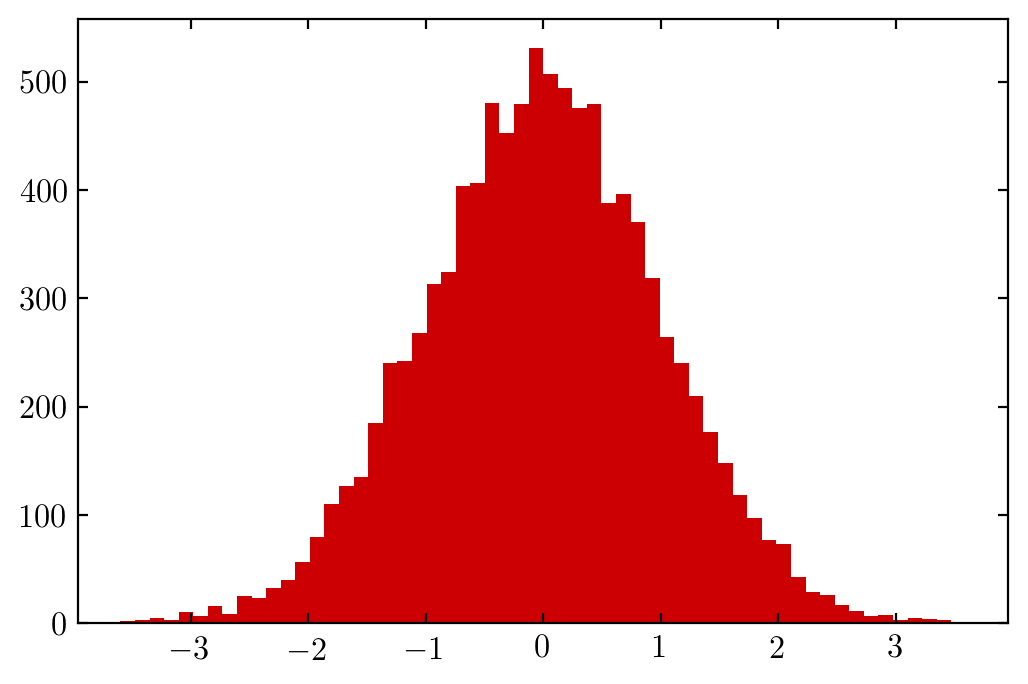

In [7]:
d1_m0_v1 = np.random.normal(size=10000)

_, ax = plt.subplots()
ax.hist(d1_m0_v1, bins="fd");

Let's now use this function to draw an arbitrary d, mean and covariance gaussian.

# Diagonal Matrixes

A diagonal covariance matrix can be seen as stretching the white data. There is still no interaction between the draws as the matrix is diagonal (eigenvectors along the axes).

Thus, the covariance matrix $\Sigma$ can be seen as a linear transformation $T$ applied to the white data, where 

$$T = \sqrt{\Sigma}$$

[(-3, 3), (-30, 30)]

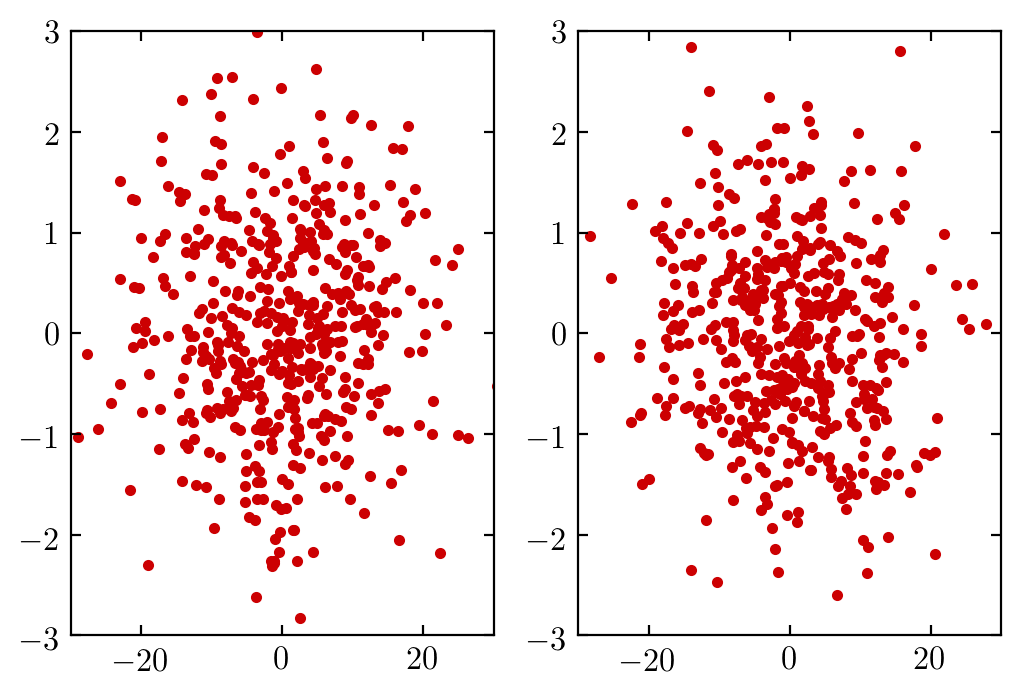

In [21]:
d1_m0_v1 = np.random.normal(size=(500, 2, 1))
m = np.array([[100, 0], [0, 1]])
proc = np.matmul(np.sqrt(m), d1_m0_v1)

draw = scipy.stats.multivariate_normal(mean=np.array([0,0]), cov=m).rvs(size=500)

_, axes = plt.subplots(1, 2)
axes[0].scatter(proc[:,0,0], proc[:,1,0])
axes[1].scatter(draw[:,0], draw[:,1])
axes[0].set(xlim=(-30, 30), ylim=(-3, 3))
axes[1].set(xlim=(-30, 30), ylim=(-3, 3))

# Arbitrary Matrixes

I don't fully follow this, but the covariance matrix can not be easily transformed into a linear transformation for non-diagonal matrixes.

The intuition about what is happening is:
* Find the eigenvectors
* rotate data onto those
* scale along the eigenvectors